## 편미분
* 한쪽 변수 방향으로만 미분하는 것

$$
f(x_0, x_1) = x^2_0 + x^2_1
$$

In [1]:
def function_2(x):
    return x[0]**2 + x[1]**2

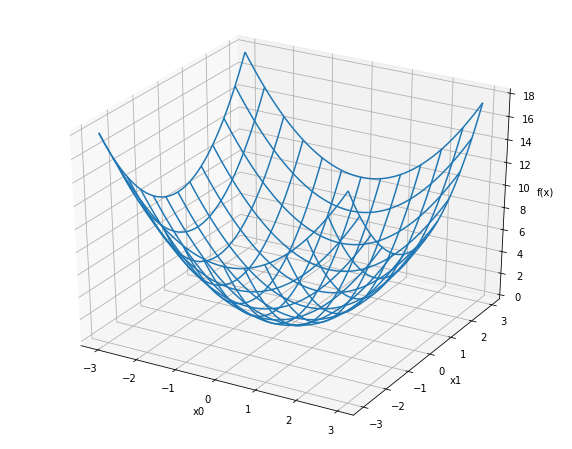

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
X0 = np.arange(-3, 3, 0.05)
X1 = np.arange(-3, 3, 0.05)
X0, X1 = np.meshgrid(X0, X1)
Z = function_2([X0,X1])
ax.plot_wireframe(X=X0, Y=X1, Z=Z,rstride=10, cstride=10)
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('f(x)')
plt.show()

1. 미분을 함에 있어서 고려해야 할 방향이 2개
    * $x_0$, $x_1$ 방향으로 고려해야 한다
2. 둘 중 하나의 방향으로만 미분을 수행한다 => **편미분**
    * 즉, $x_0$의 미분을 수행할 때는 $x_1$을 상수처럼 취급  $\frac{\partial f}{\partial x_0}$
    * $x_1$의 미분을 수행할 때는 $x_0$을 상수처럼 취급 $\frac{\partial f}{\partial x_1}$
    
$$
f(x_0, x_1) = x^2_0 + x^2_1
$$


* $x_0 = 3$, $x_1 = 4$일 때 $x_0$에 대한 편미분 $\frac{\partial f}{\partial x_0}$을 구하는 코드를 구현    

In [3]:
# 편미분 준비, x1 상수화
def function_tmp(x):
    return x ** 2 + 4 ** 2

In [4]:
# 미분 실행
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2 * h)

* $x_0$와 $x_1$ 각각의 편미분의 결과를 $(\frac{\partial f}{\partial x_0} , \frac{\partial f}{\partial x_1})$로 정리한 것을 **기울기(gradient)**라고 한다.

In [5]:
# 기울기를 구하는 코드 - 각각의 편미분을 기울기로 만든다
def numerical_gradient(f, x):
    h = 1e-4
    # 기울기를 저장할 배욜
    grad = np.zeros_like(x) # x와 형상(shape)이 같은 배열을 생성
    
    for idx in range(x.size):
        # x의 값을 idx에 맞게 하나씩 뺴온다
        tmp_val = x[idx]
        
        # 각 좌표에서 미분을 수행 -> 편미분
        # 1. f(x + h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # 2. f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        # 3. 기울기 계산
        grad[idx] = (fxh1 - fxh2) / 2 * h
        
        # x[idx]를 원개 값으로 복구
        x[idx] = tmp_val
    
    return grad

In [6]:
# x = [3, 4] 일 때의 기울기 배열
result = numerical_gradient(function_2, np.array([3.0, 4.0]))
result

array([6.e-08, 8.e-08])

* 화살표 벡터로 확인

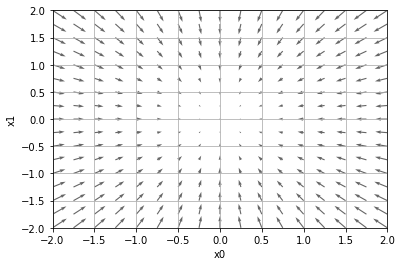

In [7]:
def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.draw()
    plt.show()

## 경사하강법

In [8]:
# 경사하강법 구현
# 편미분, 초기 x 좌표, Learning rate, step_num
def gradient_descent(f, x, lr=0.01, step_num=100):
    for _ in range(step_num):
        # 기울기 배열을 구하기
        grad = numerical_gradient(f, x)
        x -= lr * grad
        print("기울기 : {}, x 좌표 : {}".format(grad, x))
    return x    

In [9]:
gradient_descent(function_2, np.array([3.0, 4.0]))

기울기 : [6. 8.], x 좌표 : [2.94 3.92]
기울기 : [5.88 7.84], x 좌표 : [2.8812 3.8416]
기울기 : [5.7624 7.6832], x 좌표 : [2.823576 3.764768]
기울기 : [5.647152 7.529536], x 좌표 : [2.76710448 3.68947264]
기울기 : [5.53420896 7.37894528], x 좌표 : [2.71176239 3.61568319]
기울기 : [5.42352478 7.23136637], x 좌표 : [2.65752714 3.54336952]
기울기 : [5.31505429 7.08673905], x 좌표 : [2.6043766  3.47250213]
기울기 : [5.2087532  6.94500427], x 좌표 : [2.55228907 3.40305209]
기울기 : [5.10457814 6.80610418], x 좌표 : [2.50124329 3.33499105]
기울기 : [5.00248657 6.6699821 ], x 좌표 : [2.45121842 3.26829123]
기울기 : [4.90243684 6.53658246], x 좌표 : [2.40219405 3.2029254 ]
기울기 : [4.8043881  6.40585081], x 좌표 : [2.35415017 3.13886689]
기울기 : [4.70830034 6.27773379], x 좌표 : [2.30706717 3.07608956]
기울기 : [4.61413434 6.15217911], x 좌표 : [2.26092582 3.01456777]
기울기 : [4.52185165 6.02913553], x 좌표 : [2.21570731 2.95427641]
기울기 : [4.43141462 5.90855282], x 좌표 : [2.17139316 2.89519088]
기울기 : [4.34278632 5.79038176], x 좌표 : [2.1279653  2.83728706]
기울기 : [4.2

array([0.39785867, 0.53047822])

* 하이퍼 파라미터( Learning rate )를 적절하게 조절하는 것이 좋다.
* adam 같은 알고리즘은 이러한 파라미터도 적절하게 조절해 준다.

In [10]:
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

## 신경망 구성

### 신경망에서의 기울기
* 신경망의 학습이란 손실함수(Loss)의 값을 최소화 시키는 가중치 w와 편향 b를 구하는 것이다.
* 따라서 가중치의 기울기 배열을 구할 수 있지 않을까?
    * Loss 에 대한 w의 미분값을 구하는 것
    * w가 변했을 때 Loss는 얼마만큼 변할 것인가?

In [11]:
# 클래스로 하는 이유
# tf, keras, pytorch 등을 사용하면 보통 개발자가 직접 커스터마이징 하는 경우가 많다
# 기본적인 CNN, RNN 같은 것은 그냥 쓰면 되는데, 실무는 거의 그럴 일이 없음
# 특정 비즈니스에 맞춰서 레이어를 커스터마이징 하는 것이 필요

class Simplenet:
    # 신경망에서 초기화는 필요한 매개변수를 준비하는 과정
    def __init__(self):
        self.W = np.random.randn(2, 3) # 정규분포로 초기화
        # 실제 신경망은 np.random.randn(2, 3) * 0.01 로 하는 경우가 많다( 표준편차 = 0.01 )
        
    def predict(self, x):
        return np.dot(x, self.W)
        
    def loss(self, x, t):
        # loss를 구하는 과정
            
        # 1. 예측
        z = self.predict(x)
         
        # 2. softmax 통과
        y = softmax(z)
            
        # 3. loss 함수를 이용해 실제 loss 값 구하기
        loss = cross_entropy_error(y, t)
            
        return loss

In [12]:
net = Simplenet()

print("가중치 확인 : \n{}".format(net.W))

가중치 확인 : 
[[ 0.25338666  1.33914964  0.78452508]
 [-0.14370761  1.46216439 -1.83517583]]


In [13]:
x = np.array([0.6, 0.9])
p = net.predict(x)

# 예측값
print("단순 예측 값 : {}".format(p))

단순 예측 값 : [ 0.02269514  2.11943773 -1.1809432 ]


In [14]:
print("최댓값의 인덱스 : {}".format(np.argmax(p)))

최댓값의 인덱스 : 1


In [15]:
# 임의의 정답을 마련
t = np.array([0, 1, 0]) # 정답은 1

net.loss(x, t)

0.14818286941681275

* loss에 대한 기울기를 따로 만들자

In [16]:
# Loss에 대한 W의 기울기를 구하기 위한 함수
def f(w):
    return net.loss(x, t)

# 기울기에 대한 Loss의 기울기 배열
dw = numerical_gradient(f, net.W)
dw

array([[ 0.06356125, -0.082636  ,  0.01907475],
       [ 0.09534187, -0.123954  ,  0.02861213]])

In [17]:
dw = numerical_gradient(lambda w : net.loss(x, t), net.W)
dw

array([[ 0.06356125, -0.082636  ,  0.01907475],
       [ 0.09534187, -0.123954  ,  0.02861213]])

### 신경망 실습.py 에서 해보고 강사님이랑 같이 구현해보기

In [26]:
from common.functions import *

class TwoLayerNet:
  # input_size : 입력 데이터 shape( 이미지 크기 ( 28 * 28 ))
  # hidden_size : 은닉층의 뉴런 개수
  # output_size : 출력층의 뉴런 개수
  # weight_init_std :  정규분포 랜덤값에 표준편차를 적용하기 위함
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 나중에 매개변수(W, B)들은 경사하강법으로 모두 한꺼번에 업데이트가 되어야 해요
        self.params = {}
        # 1층 매개변수 마련하기
        self.params["W1"] = weight_init_std * np.random.randn(input_size, hidden_size) # 정규분포 랜덤에다가 표준편차 0.01을 적용
        self.params["b1"] = np.zeros(hidden_size)
        # 2층(출력층) 매개변수 마련하기
        self.params["W2"] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
    def predict(self, X):
        # 매개변수를 params에서 꺼내옵니다.
        W1, W2, b1, b2 = self.params["W1"], self.params["W2"], self.params["b1"], self.params["b2"]
        # 1층 계산
        z1 = np.dot(x, W1) + b1
        a1 = sigmoid(z1)
        # 2층 계산
        z2 = np.dot(a1, W2) + b2
        y = softmax(z2)
        return y
    def loss(self, x, t):
        # 1. predict
        y = self.predict(x)
        # 2. cee
        loss_val = cross_entropy_error(y, t)
        return loss_val
  
    def accuracy(x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        accuracy = np.sum(y==t) / float(x.shape[0])
        return accuracy
      # 매개변수들의 기울기 배열을 구하는 함수
    def numerical_gradient_params(self, x, t):
        print("미분 시작")
        loss_W = lambda W : self.loss(x, t) # L값 ( 미분 대상 함수 )
        # 각 층에서 구해지는 기울기를 저장할 딕셔너리
        # 저장하는 이유 : 각 매개변수의 기울기를 저장 해야만 나중에 경사하강법을 수행할 수 있어요
        grads = {}
        # 1층 매개변수들의 기울기 구하기 (Loss에 대한 W1, b1의 기울기를 grads에 저장)
        grads["W1"] = numerical_gradient(loss_W, self.params["W1"])
        grads["b1"] = numerical_gradient(loss_W, self.params["b1"])
        # 2층 매개변수들의 기울기 구하기 (Loss에 대한 W2, b2의 기울기를 grads에 저장)
        grads["W2"] = numerical_gradient(loss_W, self.params["W2"])
        grads["b2"] = numerical_gradient(loss_W, self.params["b2"])
        print("미분 끝")
        return grads

In [27]:
# 신경망 생성
input_size = 28*28
hidden_size = 100
output_size = 10

net = TwoLayerNet(input_size=input_size, hidden_size=hidden_size, output_size=output_size)

In [24]:
net.params["W1"].shape, net.params["W2"].shape

((784, 100), (100, 10))

* 신경망을 구축하고 이해하는데 매개변수의 개수를 알 고 있는 것이 중요!!

In [28]:
x = np.random.rand(100, 784)
y = net.predict(x)

In [29]:
x.shape, y.shape

((100, 784), (100, 10))

### MNIST 데이터 로딩 및 전처리

In [32]:
from tensorflow.keras import datasets

mnist = datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [33]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

#### 데이터 전처리

In [34]:
from sklearn.preprocessing import OneHotEncoder

y_train_dummy = OneHotEncoder().fit_transform(y_train.reshape(-1, 1))
y_train_dummy = y_train_dummy.toarray()

y_test_dummy = OneHotEncoder().fit_transform(y_test.reshape(-1, 1))
y_test_dummy = y_test_dummy.toarray()

In [35]:
y_train_dummy.shape, y_test_dummy.shape

((60000, 10), (10000, 10))

In [36]:
# feature 전처리
x_train = x_train.reshape(x_train.shape[0], -1)
x_train = x_train / 255.0

x_test = x_test.reshape(x_test.shape[0], -1)
x_test = x_test / 255.0

x_train.shape, x_test.shape

((60000, 784), (10000, 784))

### 훈련(학습)
* 미니 배치 선정
* 반복 횟수 설정
* 학습률 설정

In [37]:
from tqdm import tqdm_notebook

# 반복 횟수 설정
iter_nums = 10000

# 미니 배치 설정
train_size = x_train.shape[0]
batch_size = 100

# 학습률 설정
learning_rate = 0.1

network = TwoLayerNet(input_size=input_size, hidden_size=hidden_size, output_size=10)

In [38]:
for i in tqdm_notebook(range(iter_nums)):
    # 미니 배치 인덱스 선정
    batch_mask = np.random.choice(train_size, batch_size)
    
    # 미니 배치 만들기
    x_batch = x_train[batch_mask]
    t_batch = y_train_dummy[batch_mask]
    
    '''
    각 배치 마다의 기울기를 계산
    
    network의 numerical_gradient_params에서 하는 일
    1. 예측
    2. cross_entropy_error를 이용한 Loss 구하기
    3. 구해진 Loss 값을 이용해 미분을 해서 << 각 층의 매개변수 기울기를 저장>>
    '''
    
    grads = network.numerical_gradient_params(x_batch, t_batch)
    
    # 모든 매개변수의 기울기를 업데이트 ( 경사하강법 )
    for key in grads.keys():
        network.params[key] -= learning_rate * grads[key] # 경사하강법
        
    # 갱신된 Loss 확인
    loss = network.loss(x_batch, t_batch)
    print("step {} => Loss {}".format(i + 1, loss))    

<ipython-input-38-2dcf645fd7a1>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(iter_nums)):


미분 시작
미분 끝
step 1 => Loss 2.288182741708497
미분 시작
미분 끝
step 2 => Loss 2.264811581214209
미분 시작
미분 끝
step 3 => Loss 2.271239536676221
미분 시작
미분 끝
step 4 => Loss 2.285531151437194
미분 시작
미분 끝
step 5 => Loss 2.2948267532196067
미분 시작
미분 끝
step 6 => Loss 2.285516338451882
미분 시작



KeyboardInterrupt: 

* 시간이 오래 걸리는 문제를 오차역전파를 활용하여 해결할 수 있다.